# Casus groep 9 Machine Learning

### Preliminary package and data loading

In [20]:
# import packages
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

%matplotlib inline

In [21]:
# import data
casus_df = pd.read_csv('CasusData.csv')

In [22]:
casus_df = casus_df[:]

### Exploritory data analysis:

In [23]:
casus_df.shape

(19937, 529)

In [24]:
casus_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [25]:
casus_df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [13]:
# casus_df.sort_values(by= ["USERID", "TIMESTAMP"])

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
109,100,100,100,100,100,100,100,100,100,100,...,100,-7536.598200,4.864918e+06,2,1,101,2,2,23,1371713638
222,100,100,100,100,100,100,100,100,100,100,...,100,-7536.598200,4.864918e+06,2,1,101,2,2,23,1371713639
326,100,100,100,100,100,100,100,100,100,100,...,100,-7536.598200,4.864918e+06,2,1,101,2,2,23,1371713640
434,100,100,100,100,100,100,100,100,100,100,...,100,-7536.598200,4.864918e+06,2,1,101,2,2,23,1371713642
548,100,100,100,100,100,100,100,100,100,100,...,100,-7536.598200,4.864918e+06,2,1,101,2,2,23,1371713643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,100,100,100,100,100,100,100,100,100,100,...,100,-7348.012900,4.864758e+06,3,2,239,2,2,23,1371721691
981,100,100,100,100,100,100,100,100,100,100,...,100,-7348.012900,4.864758e+06,3,2,239,2,2,23,1371721693
111,100,100,100,100,100,100,100,100,100,100,...,100,-7348.012900,4.864758e+06,3,2,239,2,2,23,1371721696
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.143600,4.864982e+06,0,0,122,2,11,13,1369909710


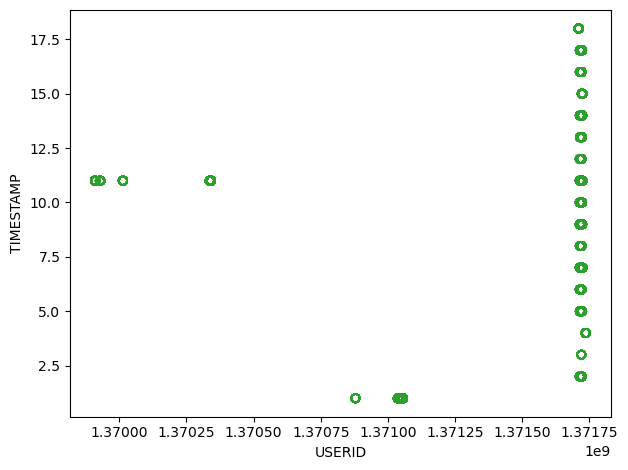

In [34]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
#fig.set_size_inches(5, 3)

ax.scatter(casus_df.TIMESTAMP, casus_df.USERID , color='C2', facecolor='none')
plt.ylabel('TIMESTAMP')
plt.xlabel('USERID')

plt.tight_layout()
plt.show()

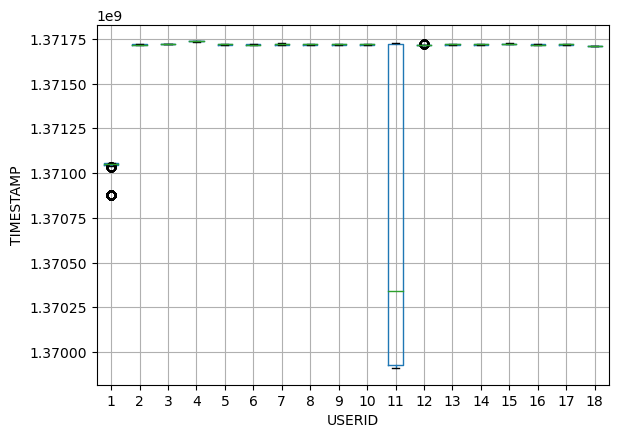

In [31]:
ax = casus_df.boxplot(column='TIMESTAMP', by='USERID')
ax.set_ylabel('TIMESTAMP')

plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

## Data reduction, cleaning

In [7]:
# reduce data frame to the top 1000 rows and select columns for regression analysis
# casus_df = casus_df.iloc[:1000]
# reduce here